# 2 Labelling Stock Relevances

## 2.1 Imports and Dataset Load

In [1]:
# General DS Purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override() # bypassing default pandas_datareader with yfinance Y! API implementation

# Zipfile Support
import glob
import zipfile

#Exports for future use
import pickle

In [2]:
# catch the most recent zip file
lst_zip_files = glob.glob('data/config/*price_comp*zip') # * means all if need specific format then *.csv
latest_zip_file = max(lst_zip_files, key=os.path.getctime)  
zf = zipfile.ZipFile(latest_zip_file)

In [3]:
# looks for good composition (In Review for Further Checks)
try:
    tickers = pd.read_csv(zf.open("tickers.csv"), usecols=[1]).loc[:,"0"].tolist()
except:
    raise Exception("Sorry. ZIP file with bad structure.")    

### 2.1.1 Loading the Dynamic Portfolio `rsp_proxy`

In [4]:
csv_files_excluded = ["tickers.csv", "skips_alltimes.csv", "sp500_components_cached.csv"]
data_dict = {f.strip(".csv"): pd.read_csv(zf.open(f), index_col="date", parse_dates=True)["close"].pct_change() for f in zf.namelist() if f not in csv_files_excluded}

In [5]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
plt.style.use("fivethirtyeight")

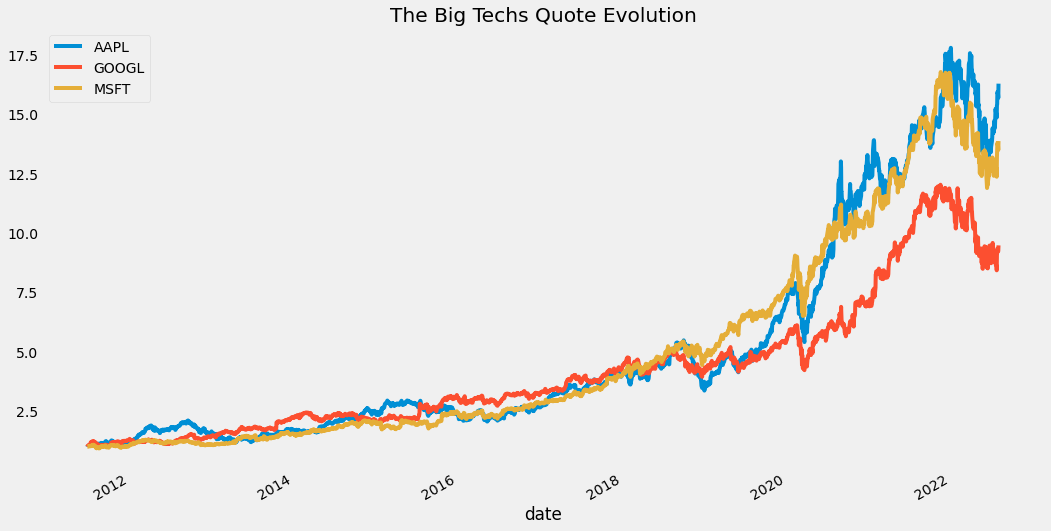

In [7]:
# testing Gross Returns Evolution ($AAPL and other BigTechs Equity Lines shown)
(1+data_dict["AAPL"]).rename("AAPL").cumprod().plot(figsize=(16,9), title="The Big Techs Quote Evolution", legend=True)
(1+data_dict["GOOGL"]).rename("GOOGL").cumprod().plot(legend=True)
(1+data_dict["MSFT"]).rename("MSFT").cumprod().plot(legend=True)
plt.grid();

### 2.1.2 Loading Baseline Portfolio:

In [4]:
baseline_port = pd.read_csv(
    "data/config/20220907_baseline_price_components_data.csv",
    index_col="Date",
    parse_dates=True
)

In [5]:
rl3000_initial_data = pd.read_csv(
    "data/config/20220907_rl3000surv_price_components_initial_data.csv",
    index_col="Date",
    parse_dates=True,
    na_values="#N/A"
)

rl3000_surviving_initial_tickers = set(rl3000_initial_data.columns)

sp500_filtered_data = pd.read_csv(
    "data/config/20220907_sp500surv_price_components_non-null_data.csv",
    index_col="Date",
    parse_dates=True
)

sp500_surviving_tickers = set(sp500_filtered_data.columns)

In [6]:
len(rl3000_surviving_initial_tickers)

909

In [7]:
len(sp500_surviving_tickers)

239

In [8]:
sp500_surviving_tickers.intersection(rl3000_surviving_initial_tickers)

set()

These Ones are Pure Surviving Stocks (Never Migrating)

In [10]:
from modules import generate_data

ivv = pd.read_pickle("data/pkl/IVV_historical_components_20220907.pkl")
iwv = pd.read_pickle("data/pkl/IWV_historical_components_20220908.pkl")

sp500_surv_tickers, sp500_tickers = generate_data.all_times_stocks(ivv, ivv.index[0], ivv.index[-1])
rl3000_surv_tickers, rl3000_tickers = generate_data.all_times_stocks(iwv, iwv.index[0], iwv.index[-1])

print(len(sp500_surv_tickers))
print(len(rl3000_surv_tickers))

234
946


In contrast, these ones accounts for initial and final coincidents

In [11]:
sp500_surv_tickers2 = generate_data.simple_surviving_stocks(ivv)
rl3000_surv_tickers2 = generate_data.simple_surviving_stocks(iwv)

In [12]:
print(len(sp500_surv_tickers2))
print(len(rl3000_surv_tickers2))

248
1154


In [13]:
print(sp500_surv_tickers2.intersection(rl3000_surv_tickers2))
print(len(sp500_surv_tickers2.intersection(rl3000_surv_tickers2)))

{'AES', 'PKI', 'AAPL', 'FITB', 'F', 'CTAS', 'GIS', 'CMI', 'ITW', 'HD', 'BK', 'AMAT', 'PEP', 'ABC', 'MKC', 'UPS', 'PFE', 'DUK', 'UNP', 'DE', 'DG', 'ORCL', 'CMS', 'TXT', 'DHI', 'BSX', 'CL', 'FISV', 'YUM', 'EOG', 'MCO', 'BF-B', 'PSA', 'NVDA', 'KO', 'USB', 'BEN', 'HBAN', 'PCAR', 'PHM', 'CAT', 'KMI', 'CSX', 'GILD', 'RF', 'CEG', 'AEP', 'HIG', 'WM', 'AIG', 'VNO', 'KHC', 'SO', 'EIX', 'EA', 'VZ', 'HAL', 'SPG', 'VMC', 'PPL', 'DOW', 'NOC', 'ADP', 'GWW', 'CAH', 'STT', 'ALL', 'ZION', 'EXC', 'HES', 'JPM', 'NTRS', 'PRU', 'JNPR', 'CVS', 'TXN', 'HPQ', 'RHI', 'TGT', 'MRK', 'MCD', 'MMM', 'GS', 'WY', 'NKE', 'WFC', 'LH', 'WHR', 'HSY', 'JNJ', 'PH', 'L', 'EMN', 'OXY', 'COF', 'FCX', 'IP', 'IPG', 'D', 'EBAY', 'CMA', 'EQR', 'APD', 'LOW', 'IFF', 'NSC', 'MO', 'ZBH', 'NUE', 'NTAP', 'DVN', 'HAS', 'NWL', 'HLT', 'GLW', 'KLAC', 'MRO', 'CME', 'BAC', 'MDT', 'LLY', 'DIS', 'ADI', 'TER', 'EMR', 'DGX', 'VRSN', 'WMT', 'AMGN', 'EL', 'LNC', 'APA', 'INTU', 'TSN', 'LMT', 'SCHW', 'FDX', 'MAS', 'PNC', 'OMC', 'IBM', 'AEE', 'SHW', '

In [14]:
sp500_surv_tickers2.difference(rl3000_surv_tickers2)

{'CCL', 'IR', 'SLB'}

In [15]:
baseline_port[list({'CCL','SLB'})]

,CCL,SLB
Date,,
2006-09-28,32.031052,43.204430
2006-09-29,32.099293,44.122017
2006-10-02,32.174377,43.325329
2006-10-03,32.781826,41.497314
2006-10-04,33.266422,42.037876
...,...,...
2022-08-30,9.770000,38.502197
2022-08-31,9.460000,37.974636
2022-09-01,9.350000,36.680607


Graphic comparison with main _Big Techs_ as a fast check

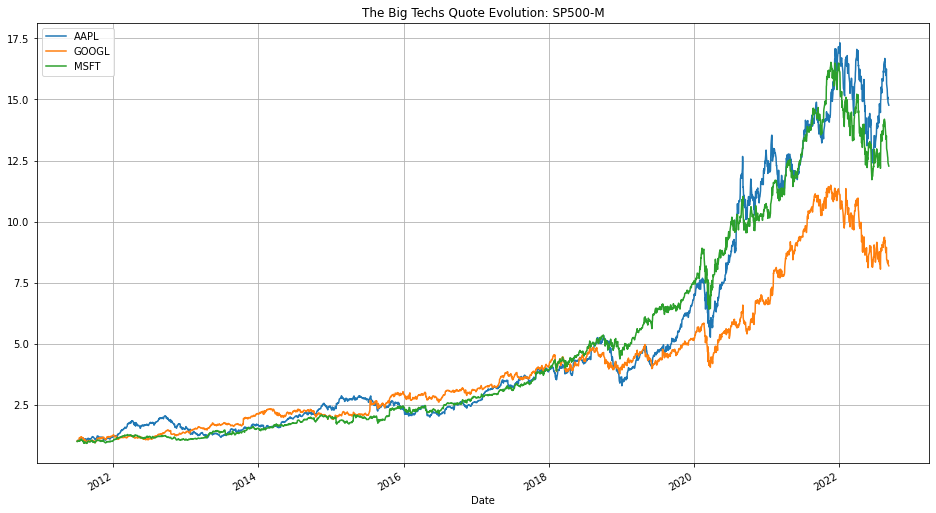

In [16]:
(1+baseline_port["AAPL"]["2011-07-01":].pct_change()).rename("AAPL").cumprod().plot(figsize=(16,9), title="The Big Techs Quote Evolution: SP500-M", legend=True)
(1+baseline_port["GOOGL"]["2011-07-01":].pct_change()).rename("GOOGL").cumprod().plot(legend=True)
(1+baseline_port["MSFT"]["2011-07-01":].pct_change()).rename("MSFT").cumprod().plot(legend=True)
plt.grid();

## 2.2 Resampling Raw Daily Returns

### 2.2.1 Legacy Portfolio `rsp_proxy`:

In [ ]:
rsp_proxy = pd.DataFrame(data_dict)
del data_dict
rsp_proxy.head()

In [11]:
import modules.performance_measures_helper as pms
rsp_proxy["AAPL"].resample("BM").apply(pms.net_cumreturn, last_row=True)[:-1] # (Net) Cumulative Return and Monthly Resampling

date
2011-06-30    0.004879
2011-07-29    0.163286
2011-08-31   -0.007462
2011-09-30   -0.009121
2011-10-31    0.054028
                ...   
2022-03-31    0.054457
2022-04-29   -0.097131
2022-05-31   -0.054496
2022-06-30   -0.081430
2022-07-29    0.188634
Freq: BM, Name: AAPL, Length: 134, dtype: float64

After test with `AAPL` let's try with the entire dataframe

In [12]:
rsp_proxy_monthly_returns = rsp_proxy.resample("BM").apply(pms.net_cumreturn, last_row=True)[1:-1]

In [13]:
rsp_proxy_monthly_returns.head()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,-0.175113,-0.071248,NaN,NaN,0.163286,NaN,-0.074638,NaN,-0.015840,NaN,...,-0.004989,-0.103747,NaN,NaN,-0.039461,-0.050316,NaN,-0.087880,NaN,NaN
2011-08-31,-0.125474,-0.124954,NaN,NaN,-0.007462,NaN,0.036231,NaN,0.031832,NaN,...,-0.070996,-0.120673,NaN,NaN,0.029345,-0.052149,NaN,-0.203123,NaN,NaN
2011-09-30,-0.152428,-0.252344,NaN,NaN,-0.009121,NaN,-0.058363,NaN,-0.026091,NaN,...,-0.126710,-0.155444,NaN,NaN,-0.091595,-0.059940,NaN,-0.192661,NaN,NaN
2011-10-31,0.186240,0.124347,NaN,NaN,0.054028,NaN,0.094714,NaN,0.063066,NaN,...,0.204301,0.173601,NaN,NaN,0.090623,-0.015894,NaN,0.232955,NaN,NaN
2011-11-30,0.011599,-0.070590,NaN,NaN,-0.055783,NaN,-0.086342,NaN,0.004140,NaN,...,-0.022998,0.007976,0.027074,NaN,0.046108,-0.039521,NaN,-0.072600,NaN,NaN


In [14]:
rsp_proxy_monthly_returns.tail()

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZMH,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,0.015112,NaN,0.057971,0.019498,0.054457,0.077717,0.085456,0.065972,-0.026957,NaN,...,-0.088573,NaN,-0.041484,NaN,-0.028248,0.040084,0.000871,-0.075187,NaN,-0.026130
2022-04-29,-0.097278,NaN,0.028493,-0.035418,-0.097131,-0.086248,-0.022106,-0.134827,-0.037239,NaN,...,-0.187525,NaN,-0.052360,NaN,-0.017692,-0.058033,-0.106454,-0.138042,NaN,-0.058485
2022-05-31,0.069506,NaN,-0.047949,-0.048941,-0.054496,0.003336,0.026248,-0.079838,0.034890,NaN,...,-0.010753,NaN,0.046584,NaN,0.043261,-0.004472,-0.085132,0.016414,NaN,-0.035656
2022-06-30,-0.068909,NaN,-0.290431,-0.080321,-0.081430,0.049010,-0.085987,-0.061396,-0.070893,NaN,...,-0.093626,NaN,-0.072047,NaN,-0.065531,-0.124054,-0.130814,-0.107644,NaN,0.005616
2022-07-29,0.131073,NaN,0.081230,0.118609,0.188634,-0.063006,0.031453,0.183831,0.001749,NaN,...,0.012035,NaN,0.177155,NaN,0.079552,0.050733,0.216840,0.071709,NaN,0.063965


A very useful graphical comparison between types of compounding wealth invested depending on sampling frequency

In [15]:
rsp_proxy_monthly_returns.shape

(133, 755)

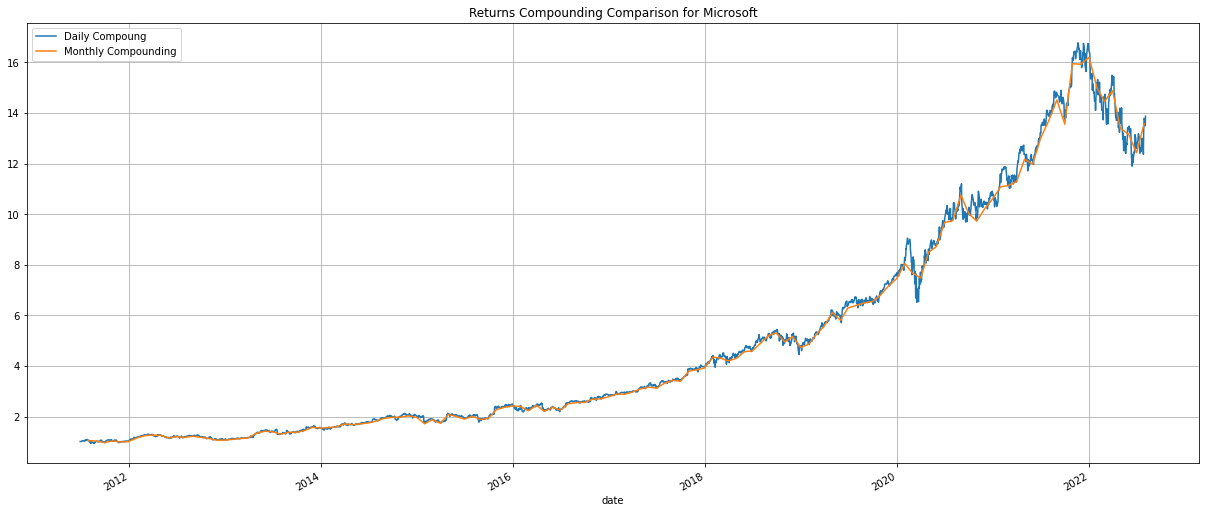

In [16]:
(1+rsp_proxy["MSFT"]).cumprod().rename("Daily Compoung").plot(legend=True)
(1+rsp_proxy_monthly_returns["MSFT"]).cumprod().rename("Monthly Compounding").plot(legend=True, title="Returns Compounding Comparison for Microsoft", figsize=(21,9))
plt.grid();


### 2.2.2 Baseline Portfolio 

[Russell 3000 with static constituents, ~50% also belongs to SP500](data/config/baseline_companies.csv)

[*********************100%***********************]  1 of 1 completed


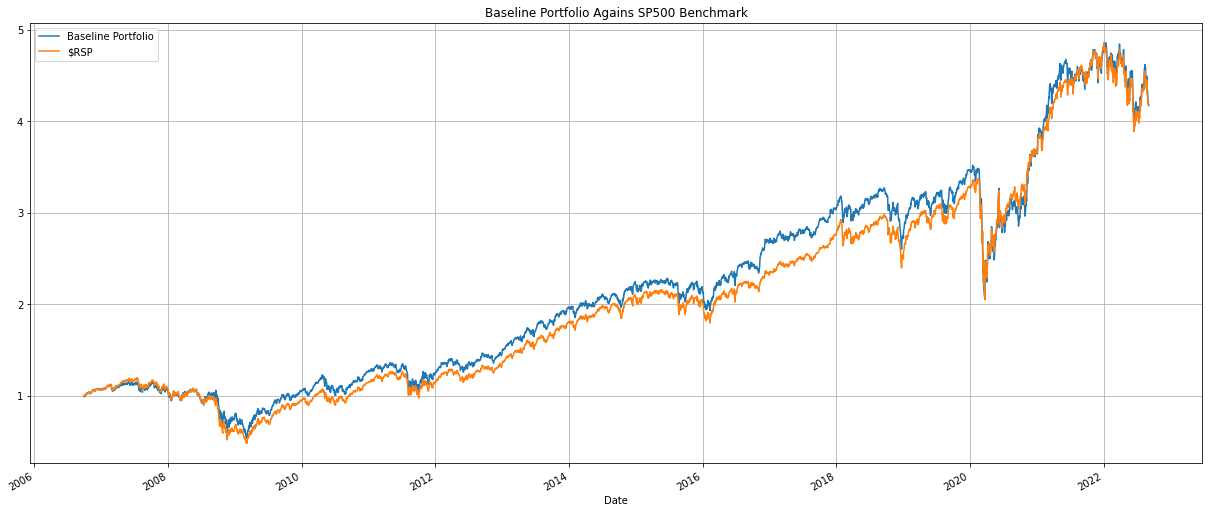

In [17]:
rsp = yf.download(
    "RSP",
    start=baseline_port.index[0],
    end=baseline_port.index[-1]
)["Adj Close"]

plot_kwds = {
    "legend": True,
    "figsize": (21,9),
    #"cmap": "coolwarm"
}

(1+baseline_port.pct_change().mean(axis=1)).cumprod().rename("Baseline Portfolio").plot(    
    title="Baseline Portfolio Agains SP500 Benchmark", 
    **plot_kwds    
)

(1+rsp.pct_change()+0.002/252).cumprod().rename("$RSP").plot(        
    **plot_kwds    
)

plt.grid()

In [18]:
baseline_port_cumrets = (1+baseline_port.pct_change()).cumprod()
baseline_port_monthly_cumrets = baseline_port_cumrets.resample("BM").apply(lambda x: x[-1])

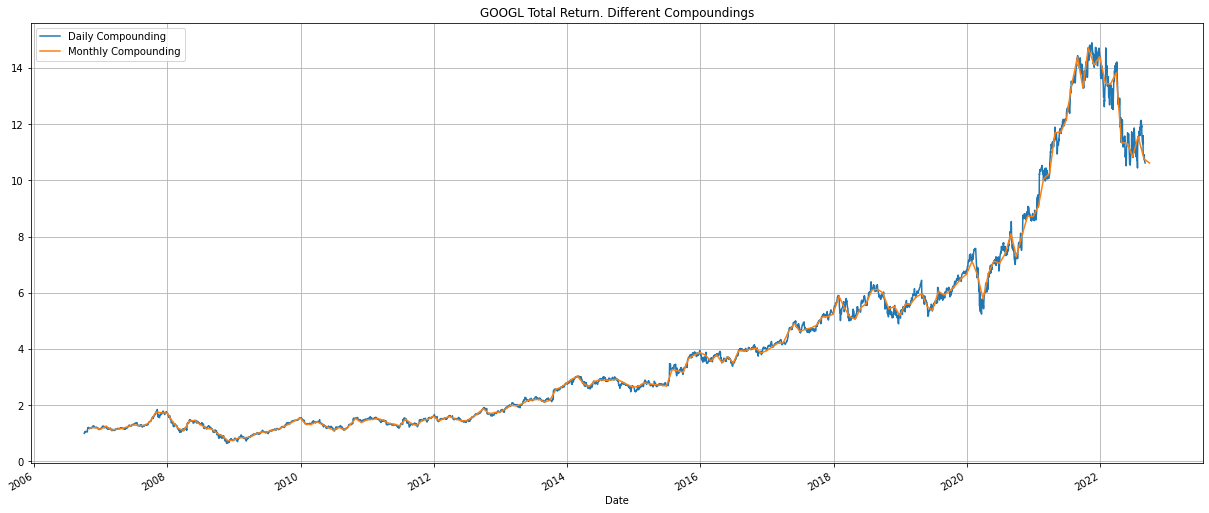

In [19]:
# However at the Stock Level (the actual needed for ranking)
(1+baseline_port_cumrets["GOOGL"].pct_change()).cumprod().rename("Daily Compounding").plot(
    **plot_kwds,
    title="GOOGL Total Return. Different Compoundings")

(1+baseline_port_monthly_cumrets["GOOGL"].pct_change()).cumprod().rename("Monthly Compounding").plot(**plot_kwds)

plt.grid();

In [20]:
# Dropping Incomplete Business Months before Downsampling
baseline_port.tail()

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-30,128.279999,158.910004,145.429993,102.199997,375.070007,152.729996,87.570000,244.533340,202.809998,92.747398,...,48.130001,37.676384,19.870001,32.623150,19.270000,39.141705,32.700001,41.259998,102.720001,56.330002
2022-08-31,128.250000,157.220001,146.559998,102.650002,373.440002,151.529999,87.889999,243.358429,201.740005,92.031975,...,47.610001,37.159996,19.540001,32.145741,19.049999,39.131798,32.009998,41.590000,101.269997,55.950001
2022-09-01,128.929993,157.960007,147.610001,104.839996,370.529999,150.690002,87.580002,244.901764,201.949997,93.264099,...,47.669998,36.779999,19.639999,32.215363,18.889999,38.715714,31.830000,41.009998,101.290001,55.540001
2022-09-02,128.009995,155.809998,147.710007,102.500000,368.140015,148.630005,87.610001,237.453934,198.690002,92.340004,...,47.490002,36.740002,19.389999,32.105953,18.690001,38.676086,31.530001,39.799999,100.769997,55.490002
2022-09-06,129.300003,154.529999,146.020004,102.709999,368.299988,148.229996,85.699997,237.115402,198.179993,92.220001,...,48.290001,37.950001,19.530001,31.280432,18.450001,38.210468,30.889999,40.139999,103.190002,54.689999


In [21]:
baseline_port = baseline_port["2006-10-02":"2022-08-31"]
print(baseline_port.index[0].strftime("%Y-%m-%d"))
print(baseline_port.index[-1].strftime("%Y-%m-%d"))

2006-10-02
2022-08-31


* Dumping Daily Rets

In [22]:
# Cross-Sectional Daily Returns
baseline_port_daily_rets = baseline_port.pct_change()

baseline_port_daily_rets.to_csv(
    "data/config/20220831_baseline_portfolio_daily_returns.csv",
    index_label="Date"
)

**Checkpoint**

* Reloading Kernel and Baseline Portfolio Rets:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_port_daily_rets = pd.read_csv(
    "data/config/20220831_baseline_portfolio_daily_returns.csv",
    index_col="Date",
    parse_dates=True
)

print(base_port_daily_rets.index[0])
print(base_port_daily_rets.index[-1])
base_port_daily_rets.shape

2006-10-02 00:00:00
2022-08-31 00:00:00


(4007, 469)

* Downsampling Monthly (For Monthly Rebalance Querying)

In [2]:
# Cross-Sectional Monthly Returns (Simple and Cumulative)
base_port_monthly_cumrets = (1+base_port_daily_rets).cumprod().resample("BM").apply(lambda x: x[-1])
base_port_monthly_rets = base_port_monthly_cumrets.pct_change()

In [3]:
base_port_monthly_rets.head(5)

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-30,-0.050771,0.130488,-0.024598,-0.017891,0.049935,0.026872,-0.085770,-0.024474,0.120544,0.011276,...,-0.003142,-0.059611,0.003110,-0.096045,-0.025785,0.063396,-0.000430,-0.105313,0.062758,0.000512
2006-12-29,0.094535,-0.074406,-0.022396,0.043935,0.023904,0.010762,-0.089459,0.026060,-0.017484,-0.006397,...,0.029098,0.030989,0.096796,0.040222,0.043959,-0.025794,0.021730,-0.035917,0.004777,0.022209
2007-01-31,-0.081779,0.010491,0.165036,0.094464,-0.054718,-0.003650,0.001251,-0.031066,0.080573,-0.011539,...,-0.032817,-0.001156,-0.013819,-0.068145,-0.049735,0.004765,-0.014450,0.038731,0.099059,-0.017184
2007-02-28,-0.007812,-0.013064,0.005116,0.030565,0.009776,0.108703,0.076981,0.042539,-0.058783,-0.017134,...,0.087982,-0.031059,0.030573,0.026828,-0.081880,-0.047428,0.025442,-0.047230,-0.031364,-0.006475


In [4]:
base_port_monthly_cumrets.head(5)

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2006-10-31,1.101485,1.083089,1.043786,0.991149,1.033784,1.085266,1.011826,1.051021,1.096360,1.024427,...,1.063013,1.059834,1.065146,0.916149,1.068867,1.083402,1.046690,1.160207,1.090922,0.998798
2006-11-30,1.045562,1.224419,1.018111,0.973416,1.085405,1.114430,0.925042,1.025298,1.228520,1.035979,...,1.059672,0.996657,1.068458,0.828157,1.041307,1.152085,1.046239,1.038022,1.159385,0.999309
2006-12-29,1.144404,1.133316,0.995310,1.016183,1.111351,1.126424,0.842289,1.052017,1.207041,1.029351,...,1.090507,1.027542,1.171881,0.861468,1.087082,1.122368,1.068974,1.000738,1.164923,1.021503
2007-01-31,1.050816,1.145205,1.159572,1.112175,1.050541,1.122312,0.843343,1.019336,1.304296,1.017473,...,1.054720,1.026354,1.155687,0.802763,1.033016,1.127716,1.053528,1.039498,1.280319,1.003949
2007-02-28,1.042607,1.130244,1.165504,1.146169,1.060811,1.244310,0.908264,1.062697,1.227625,1.000040,...,1.147516,0.994477,1.191019,0.824299,0.948433,1.074231,1.080331,0.990402,1.240164,0.997449


In [5]:
base_port_monthly_rets.iloc[0,:] = base_port_monthly_cumrets.iloc[0,:]-1

In [6]:
def graph_check(data, data_resampled, ticker, title=""):
    plt.style.use('seaborn-notebook')
    plt_kwds = {
        "legend": True,
        "figsize": (16,9),        
    }
    # Checking Compounding Through Total Return Evolution
    (1+data[ticker]).cumprod().rename(ticker + " Daily Compounding").plot(**plt_kwds, title=title)
    (1+data_resampled[ticker]).cumprod().rename(ticker + " Downsampled Compounding").plot(**plt_kwds)

    plt.grid()


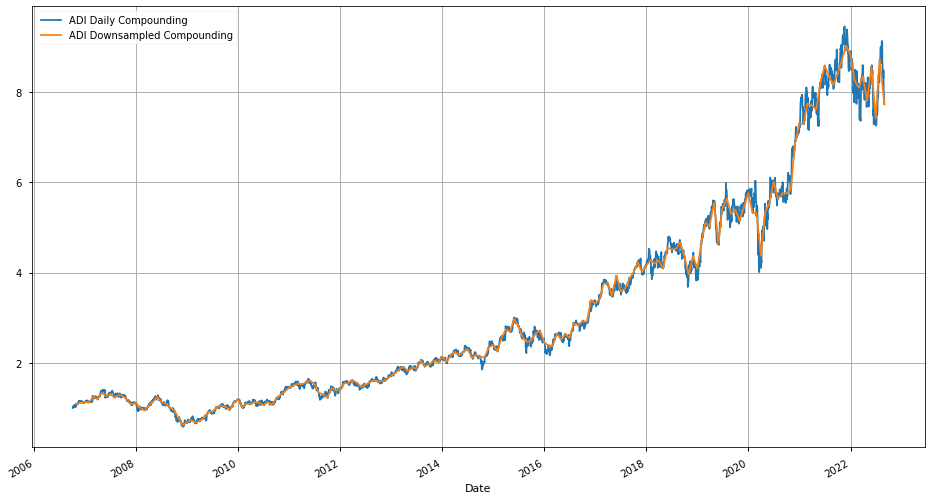

In [7]:
graph_check(base_port_daily_rets, base_port_monthly_rets, "ADI")

* Downsampling Weekly (Weekly Rebalancing)

In [8]:
from modules import performance_measures_helper as pms

base_port_weekly_rets = base_port_daily_rets.resample("W-FRI").apply(pms.net_cumreturn, last_row=True)
base_port_weekly_rets

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2006-10-06,0.030012,-0.008549,0.016144,-0.042496,0.031081,0.025580,-0.027596,0.009141,0.047136,-0.006059,...,0.016306,0.031990,0.050791,-0.009662,0.027618,0.002044,0.007506,0.053525,0.017422,0.013825
2006-10-13,0.036348,0.010779,0.004352,0.022501,0.024115,0.016295,-0.001892,-0.020645,-0.005983,0.001714,...,0.014541,0.005741,0.015411,0.011498,0.023386,0.026520,0.039338,0.049755,0.030903,0.017194
2006-10-20,0.012174,0.065716,0.011701,0.039420,-0.022268,-0.026178,0.015435,0.020004,0.005446,0.034614,...,0.014825,0.026826,-0.018627,0.003101,0.050477,-0.013116,0.001720,0.017023,-0.002855,-0.034777
2006-10-27,-0.001145,0.005754,0.000857,-0.022755,0.009686,0.046035,0.049867,0.005061,0.032212,0.006802,...,0.011240,0.015008,0.044991,-0.106456,-0.028246,0.055981,-0.003435,0.031178,0.021603,0.005233
2006-11-03,0.001990,-0.026365,-0.028033,-0.000629,-0.021260,0.002891,-0.130556,0.006924,-0.005523,-0.017528,...,-0.049053,-0.074479,-0.057854,-0.013451,-0.059472,0.009154,-0.007756,-0.001273,-0.002039,-0.024883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05,-0.003654,0.018889,-0.031659,0.003767,0.056837,0.030763,-0.000121,0.025216,0.024871,-0.019545,...,-0.020682,0.026511,-0.023765,0.027110,-0.002551,-0.072057,0.007618,-0.080663,0.001326,-0.008934
2022-08-12,-0.000449,0.040822,0.068350,0.020412,0.028240,0.011340,0.046399,0.038754,0.051015,0.038664,...,0.001712,-0.025826,0.015752,-0.040816,0.030346,0.040200,0.017738,0.051942,0.056076,0.016427
2022-08-19,0.030475,-0.003370,0.010166,-0.012738,-0.046245,-0.062814,0.011975,0.011839,-0.044719,0.026574,...,0.002089,-0.029854,-0.001880,-0.005106,0.008991,-0.006241,-0.001198,-0.013345,-0.014595,0.002832


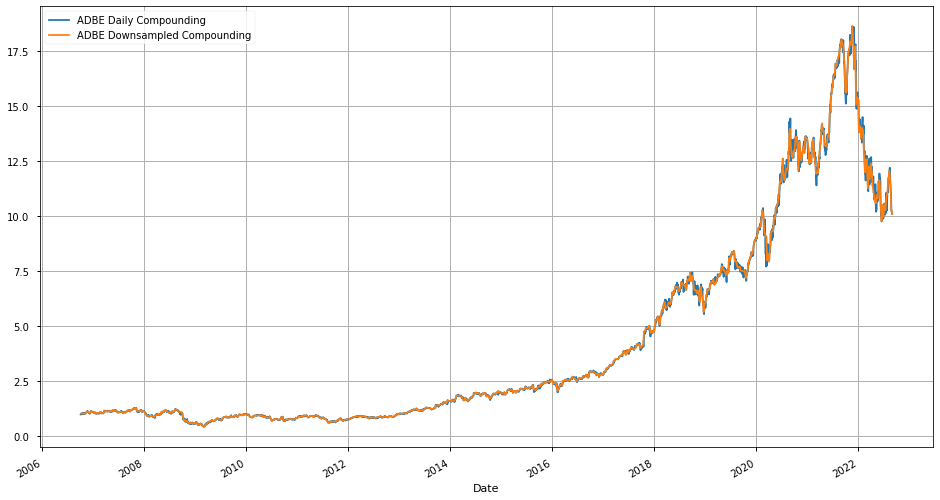

In [9]:
graph_check(base_port_daily_rets, base_port_weekly_rets, "ADBE")

* Dumping 3-Scaled Raw Returns

In [10]:
data = {
    "raw_returns": {
        "daily": base_port_daily_rets,
        "weekly": base_port_weekly_rets,
        "monthly": base_port_monthly_rets
    }
}

import pickle
with open("data/config/20220831_returns_scores.pkl","wb+") as f:
    pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
# For Standarised Returns
daily_vol = base_port_daily_rets.rolling(window="90D").apply(np.std, engine="numba", raw=True)

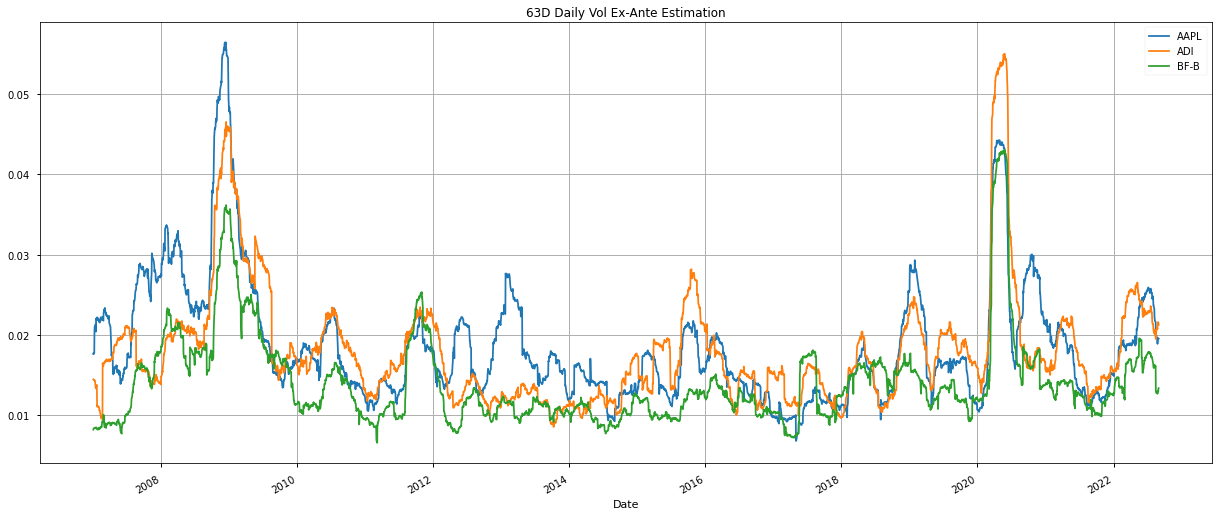

In [12]:
daily_vol[["AAPL","ADI","BF-B"]].plot(
    figsize=(21,9),
    title="63D Daily Vol Ex-Ante Estimation"
)
plt.grid();

<AxesSubplot:xlabel='Date'>

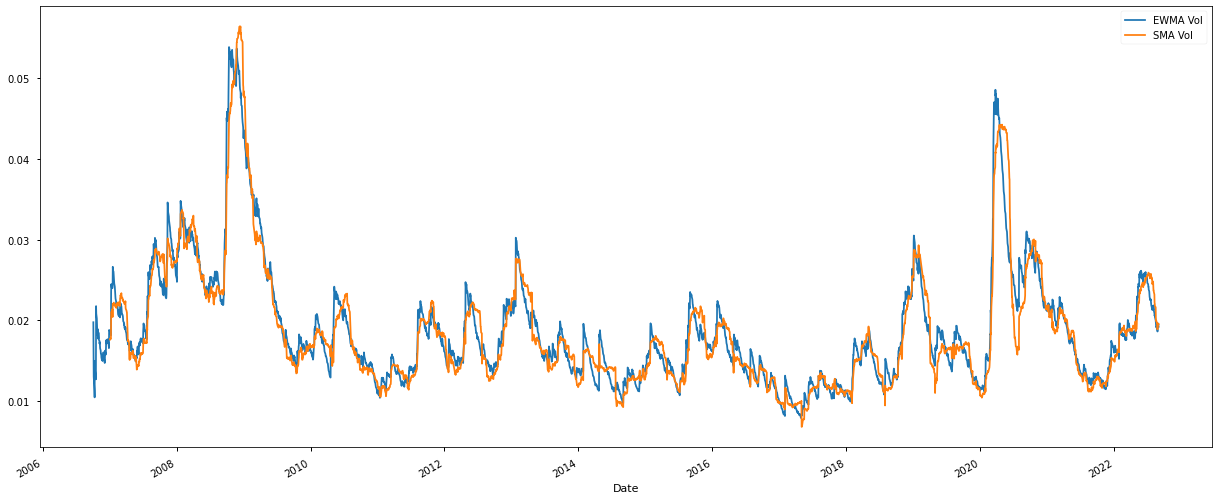

In [13]:
base_port_daily_rets.ewm(span=63).std()["AAPL"].rename("EWMA Vol").plot(figsize=(21,9), legend=True)
daily_vol["AAPL"].rename("SMA Vol").plot(legend=True)

In [14]:
ew_daily_vol = base_port_daily_rets.ewm(span=63).std()
ew_daily_vol.head()

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2006-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-04,0.019297,0.019776,0.011248,0.002255,0.024211,0.016231,0.020091,0.009324,0.022482,0.005499,...,0.011129,0.006373,0.008354,0.018385,0.026008,0.000290,0.016113,0.016036,0.003164,0.008954
2006-10-05,0.016306,0.015298,0.008741,0.003475,0.016986,0.012590,0.019176,0.007677,0.020019,0.004249,...,0.008345,0.005356,0.006758,0.016239,0.020790,0.001556,0.011665,0.011983,0.007228,0.011025
2006-10-06,0.013536,0.013060,0.015830,0.005726,0.014964,0.013130,0.015779,0.007825,0.018686,0.004396,...,0.012502,0.006561,0.011098,0.013356,0.016886,0.001480,0.011466,0.018214,0.010448,0.010723


In [15]:
ew_weekly_vol = base_port_weekly_rets.ewm(span=26).std()
ew_weekly_vol.head()

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2006-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-13,0.004480,0.013667,0.008338,0.045960,0.004926,0.006565,0.018176,0.021062,0.037561,0.005497,...,0.001248,0.018561,0.025017,0.014962,0.002993,0.017307,0.022509,0.002666,0.009532,0.002382
2006-10-20,0.012810,0.038950,0.005865,0.042641,0.029451,0.027981,0.021533,0.021286,0.027334,0.021884,...,0.000927,0.013800,0.034677,0.010427,0.014884,0.020316,0.020392,0.020403,0.017352,0.029663
2006-10-27,0.017300,0.032669,0.006908,0.037801,0.023574,0.031300,0.032653,0.017068,0.023734,0.017661,...,0.002178,0.011533,0.032057,0.056869,0.034630,0.031165,0.019191,0.016848,0.014354,0.024082
2006-11-03,0.016563,0.035138,0.017962,0.032086,0.024766,0.027245,0.072565,0.014568,0.023345,0.019825,...,0.029893,0.045530,0.046800,0.048780,0.046547,0.026864,0.018450,0.023029,0.015026,0.023499


In [77]:
del weekly_vol_fdaily

In [16]:
weekly_vol = base_port_weekly_rets.rolling(window="180D").apply(np.std, engine="numba", raw=True)

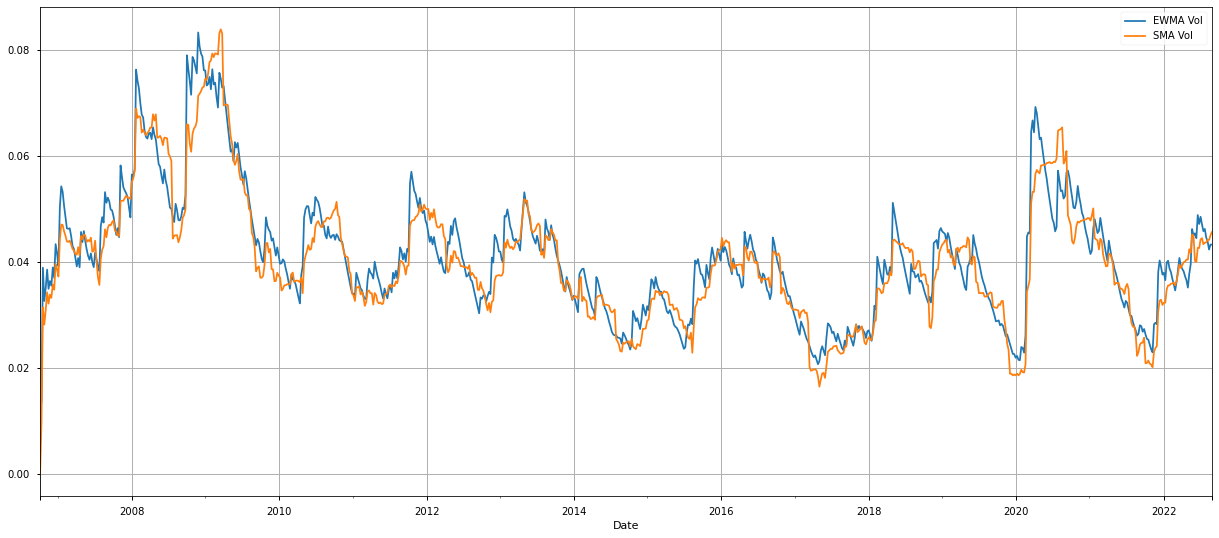

In [17]:
ew_weekly_vol["AAPL"].rename("EWMA Vol").plot(figsize=(21,9), legend=True)
weekly_vol["AAPL"].rename("SMA Vol").plot(legend=True)
#daily_vol["AAPL"].rename("SMA Vol").plot(legend=True)

plt.grid();

In [18]:
ew_monthly_vol = base_port_monthly_rets.ewm(span=12).std()
monthly_vol = base_port_monthly_rets.rolling(window="360D").apply(np.std, engine="numba", raw=True)

<AxesSubplot:xlabel='Date'>

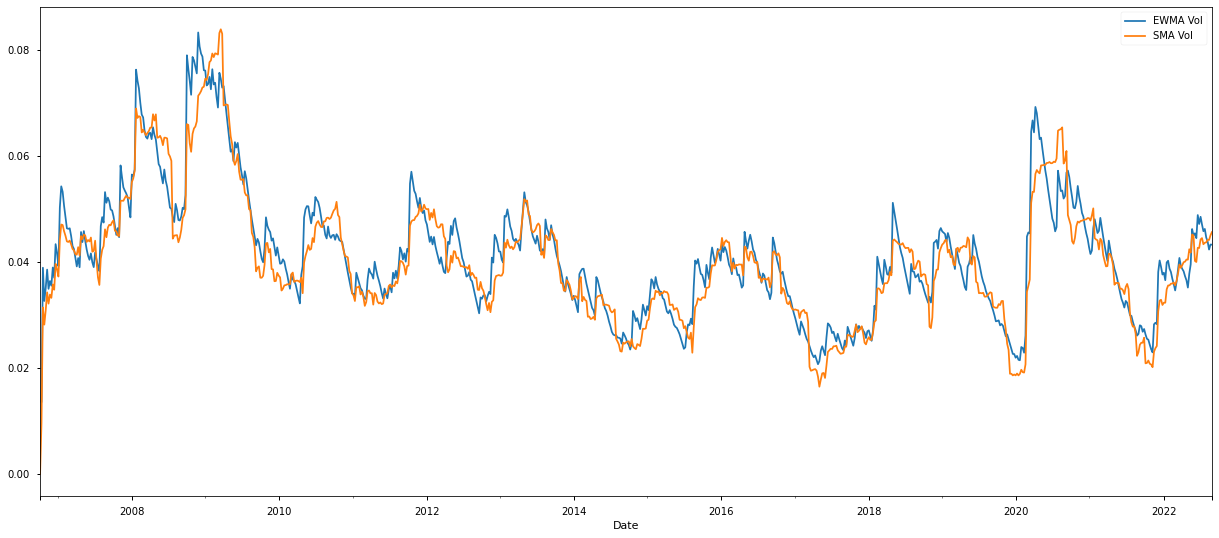

In [19]:
ew_weekly_vol["AAPL"].rename("EWMA Vol").plot(figsize=(21,9), legend=True)
weekly_vol["AAPL"].rename("SMA Vol").plot(legend=True)

In [20]:
data["sma_vols"] = {
    "daily": daily_vol,
    "weekly": weekly_vol,
    "monthly": monthly_vol
}

data["ewma_vols"] = {
    "daily": ew_daily_vol,
    "weekly": ew_weekly_vol,
    "monthly": ew_monthly_vol
}

data.keys()

dict_keys(['raw_returns', 'sma_vols', 'ewma_vols'])

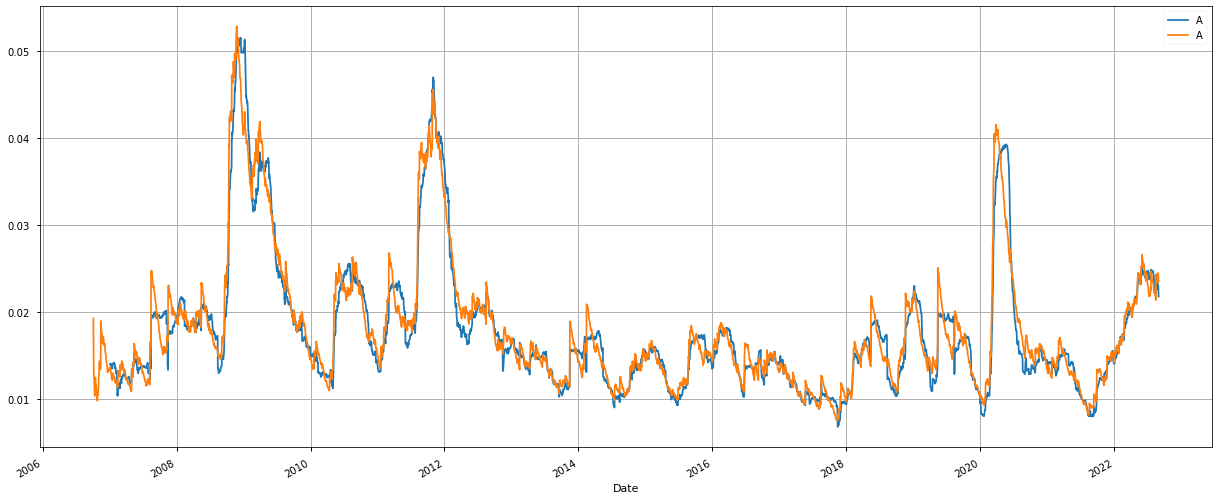

In [21]:
data["sma_vols"]["daily"]["A"].plot(figsize=(21,9), legend=True)
data["ewma_vols"]["daily"]["A"].plot(legend=True)

plt.grid();

In [22]:
with open("data/config/20220831_returns_scores.pkl","wb+") as file:
    pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)

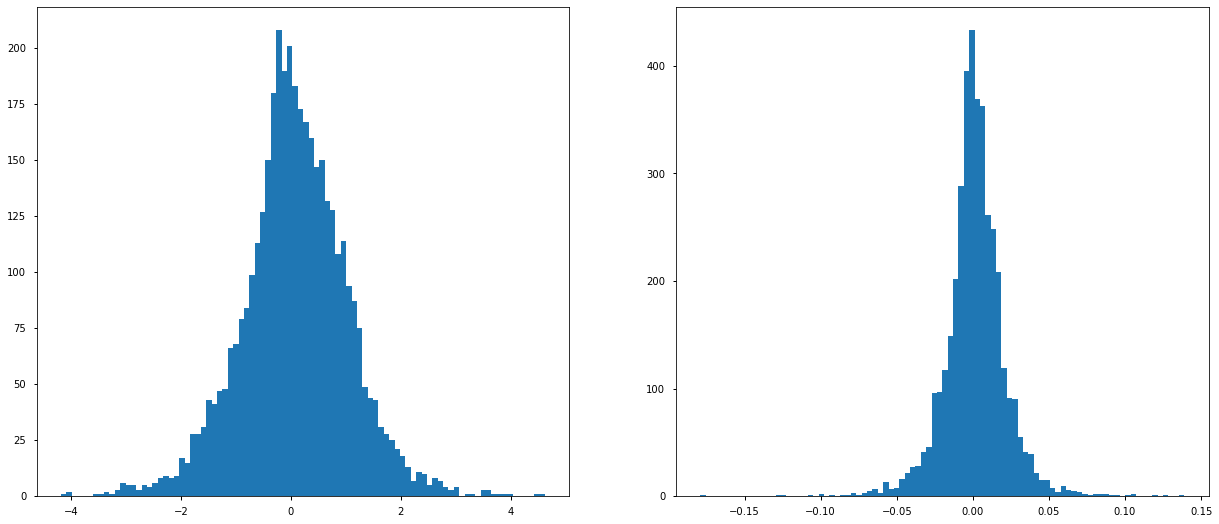

In [23]:
# Standarising Returns (for Regress-Then-Rank Purposes)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(21,9))

AAPL_std_rets = (base_port_daily_rets/data["ewma_vols"]["daily"])["AAPL"]
AAPL_raw_rets = base_port_daily_rets["AAPL"]

ax1.hist(AAPL_std_rets, bins=90);
ax2.hist(AAPL_raw_rets, bins=90);

* **Checkpoint**

Checking of Dumping Variables Before Kernel reloading

1. `Pickle` load:

In [24]:
import pickle
import pandas as pd

with open("data/config/20220831_returns_scores.pkl","rb") as file:
    return_data = pickle.load(file)

2. Check `dict()` variable

In [25]:
type(return_data)

dict

In [26]:
return_data.keys()

dict_keys(['raw_returns', 'sma_vols', 'ewma_vols'])

<AxesSubplot:xlabel='Date'>

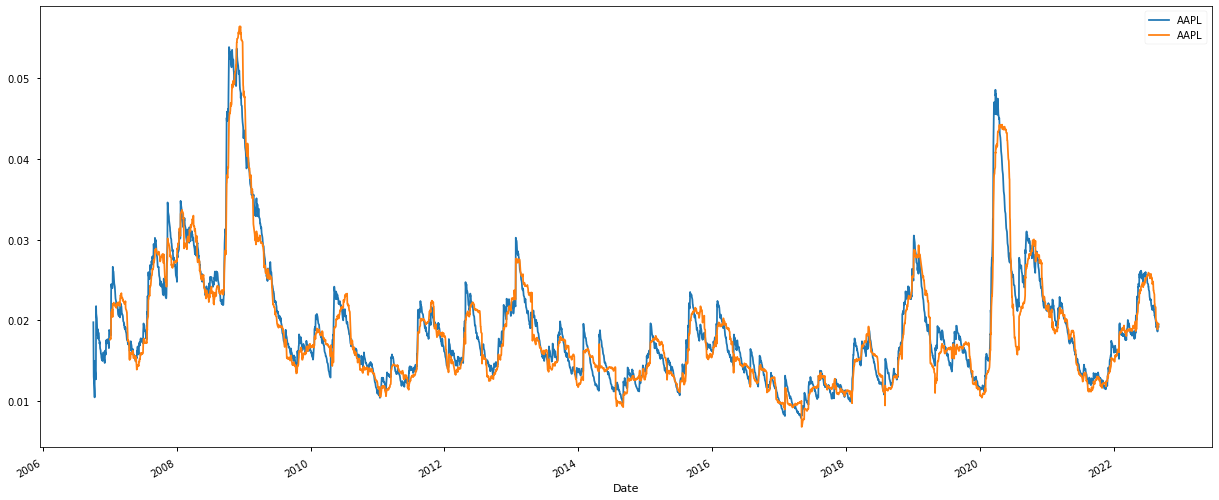

In [27]:
# Showing for Example EWMA Daily Vols calculated for $AAPL
import matplotlib.pyplot as plt

return_data["ewma_vols"]["daily"]["AAPL"].plot(figsize=(21,9), legend=True)
return_data["sma_vols"]["daily"]["AAPL"].plot(legend=True)

In [28]:
return_data["raw_returns"]["daily"]

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2006-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-03,-0.002475,-0.010419,0.000885,-0.013060,-0.006757,-0.006139,-0.027333,0.013606,-0.006862,-0.005112,...,0.003057,0.016588,0.013250,-0.020014,-0.006456,0.001227,-0.008032,0.007014,0.010344,-0.005210
2006-10-04,0.024814,0.017548,0.016791,-0.009872,0.027483,0.016815,0.001081,0.000419,0.024932,0.002665,...,0.018796,0.007575,0.025064,0.005986,0.030325,0.000817,0.014756,0.029692,0.014819,0.007452
2006-10-05,-0.004238,-0.007297,0.015428,-0.016759,0.011123,-0.003713,0.009447,0.000000,0.030481,0.001898,...,0.005983,0.006941,0.013465,0.010151,-0.004906,-0.001632,0.008501,0.025632,0.000796,0.016793
2006-10-06,0.011854,-0.008152,-0.016691,-0.003452,-0.000786,0.018631,-0.010695,-0.004822,-0.001707,-0.005494,...,-0.011401,0.000574,-0.001748,-0.005544,0.008803,0.001635,-0.007542,-0.009372,-0.008489,-0.005112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,0.017506,0.014923,0.014774,0.004268,-0.004240,0.020898,0.025609,0.008081,0.026675,0.006058,...,0.010681,0.003737,0.020783,0.013158,0.009245,0.009687,0.008649,0.000939,0.010546,0.015523
2022-08-26,-0.045144,-0.037699,-0.028121,-0.037681,-0.056718,-0.050278,-0.014850,-0.029937,-0.056234,-0.015885,...,-0.005184,-0.028047,-0.030777,-0.016824,-0.005089,-0.011316,-0.018628,-0.019709,-0.024133,-0.007813
2022-08-29,-0.013552,-0.013690,0.008893,-0.000589,-0.015117,-0.017225,0.013399,-0.006388,-0.009915,0.004853,...,-0.003808,-0.007150,-0.005374,-0.020114,-0.009719,-0.006469,-0.014763,-0.008138,-0.010503,-0.022595


## 2.3 Ranking Assets

1) Ranking for each business date

In [6]:
from modules import performance_measures_helper as pms

In [39]:
# A Ranking Primer (The Higher, The Better)
base_port_daily = return_data["raw_returns"]["daily"]
base_port_daily

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2006-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-03,-0.002475,-0.010419,0.000885,-0.013060,-0.006757,-0.006139,-0.027333,0.013606,-0.006862,-0.005112,...,0.003057,0.016588,0.013250,-0.020014,-0.006456,0.001227,-0.008032,0.007014,0.010344,-0.005210
2006-10-04,0.024814,0.017548,0.016791,-0.009872,0.027483,0.016815,0.001081,0.000419,0.024932,0.002665,...,0.018796,0.007575,0.025064,0.005986,0.030325,0.000817,0.014756,0.029692,0.014819,0.007452
2006-10-05,-0.004238,-0.007297,0.015428,-0.016759,0.011123,-0.003713,0.009447,0.000000,0.030481,0.001898,...,0.005983,0.006941,0.013465,0.010151,-0.004906,-0.001632,0.008501,0.025632,0.000796,0.016793
2006-10-06,0.011854,-0.008152,-0.016691,-0.003452,-0.000786,0.018631,-0.010695,-0.004822,-0.001707,-0.005494,...,-0.011401,0.000574,-0.001748,-0.005544,0.008803,0.001635,-0.007542,-0.009372,-0.008489,-0.005112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,0.017506,0.014923,0.014774,0.004268,-0.004240,0.020898,0.025609,0.008081,0.026675,0.006058,...,0.010681,0.003737,0.020783,0.013158,0.009245,0.009687,0.008649,0.000939,0.010546,0.015523
2022-08-26,-0.045144,-0.037699,-0.028121,-0.037681,-0.056718,-0.050278,-0.014850,-0.029937,-0.056234,-0.015885,...,-0.005184,-0.028047,-0.030777,-0.016824,-0.005089,-0.011316,-0.018628,-0.019709,-0.024133,-0.007813
2022-08-29,-0.013552,-0.013690,0.008893,-0.000589,-0.015117,-0.017225,0.013399,-0.006388,-0.009915,0.004853,...,-0.003808,-0.007150,-0.005374,-0.020114,-0.009719,-0.006469,-0.014763,-0.008138,-0.010503,-0.022595


In [40]:
# Classifying Ranking of Assets class 19 > class 18 .... > class 0
base_port_rank_daily = pd.DataFrame()
base_port_rank_daily = base_port_daily.dropna(how="all").rank(axis=1)


In [ ]:
base_port_rank_daily = base_port_rank_daily.apply(pms.scorer, axis=1)

In [46]:
base_port_rank_daily.apply(pd.value_counts, axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Date,,,,,,,,,,,,,,,,,,,,
2006-10-03,24,23,24,23,24,23,23,24,23,24,23,23,24,23,24,23,23,24,23,24
2006-10-04,24,23,24,23,24,23,23,24,23,24,23,23,24,23,24,23,23,24,23,24
2006-10-05,24,23,24,23,24,23,23,24,23,24,23,23,24,23,24,23,23,24,23,24
2006-10-06,24,23,24,23,24,23,23,24,23,24,23,23,24,23,24,23,23,24,23,24
2006-10-09,24,23,24,23,24,23,23,24,23,24,23,23,24,23,24,23,23,24,23,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,24,23,24,23,24,23,23,24,23,24,23,23,24,23,24,23,23,24,23,24
2022-08-26,24,23,24,23,24,23,23,24,23,24,23,23,24,23,24,23,23,24,23,24
2022-08-29,24,23,24,23,24,23,23,24,23,24,23,23,24,23,24,23,23,24,23,24


In [47]:
pd.concat(
    [
        base_port_rank_daily.iloc[0].sort_values().rename("rank"),
        return_data["raw_returns"]["daily"].iloc[1].sort_values().rename("raw_return")
    ],
    axis=1
).sort_values(by=["raw_return"])


,rank,raw_return
DGX,0,-0.178982
NOV,0,-0.081643
FCX,0,-0.074248
HLX,0,-0.068668
CDE,0,-0.068522
...,...,...
TPC,19,0.027053
JWN,19,0.028258
KSS,19,0.031150
HT,19,0.031218


In [48]:
base_port_rank_daily.tail()

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-25,13,11,11,3,0,15,16,5,17,3,...,7,2,14,9,6,6,5,1,7,11
2022-08-26,3,5,9,5,1,2,16,8,1,16,...,19,9,8,15,19,18,14,14,11,18
2022-08-29,5,5,18,14,4,3,19,10,7,17,...,12,9,11,2,7,10,4,8,7,1
2022-08-30,17,5,6,18,16,5,1,7,6,3,...,1,2,2,18,13,9,16,14,10,6
2022-08-31,16,7,19,18,14,10,18,13,13,10,...,7,4,3,4,6,16,2,19,4,11


In [54]:
base_port_rank_daily = base_port_rank_daily.shift(-1) 

In [57]:
base_port_rank_daily.head()

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2006-10-03,15.0,12.0,11.0,0.0,17.0,11.0,1.0,1.0,15.0,2.0,...,13.0,5.0,16.0,4.0,17.0,1.0,10.0,17.0,10.0,5.0
2006-10-04,3.0,2.0,15.0,0.0,13.0,3.0,12.0,6.0,18.0,7.0,...,10.0,11.0,14.0,13.0,3.0,5.0,12.0,18.0,7.0,16.0
2006-10-05,18.0,6.0,1.0,11.0,13.0,19.0,4.0,9.0,12.0,8.0,...,3.0,14.0,12.0,8.0,18.0,15.0,6.0,5.0,6.0,8.0
2006-10-06,10.0,12.0,8.0,16.0,0.0,17.0,19.0,8.0,11.0,12.0,...,7.0,9.0,4.0,8.0,14.0,4.0,13.0,19.0,17.0,12.0
2006-10-09,6.0,1.0,6.0,6.0,16.0,0.0,0.0,1.0,17.0,9.0,...,4.0,6.0,17.0,2.0,9.0,15.0,15.0,9.0,12.0,7.0


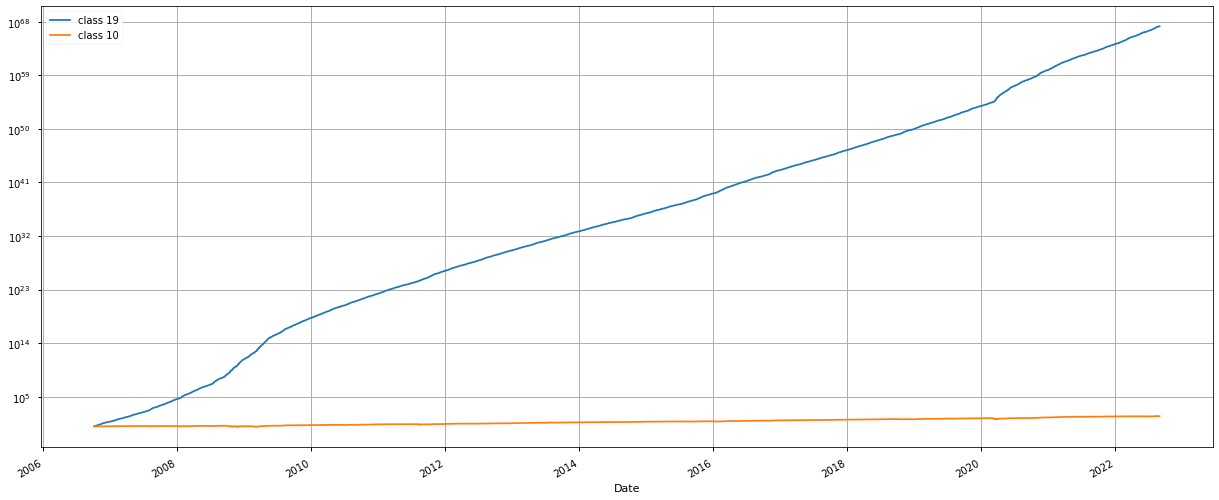

In [58]:
# Demo of "Limitless" Trading, you perfectly Know the Future, ie.:
# The Best Performers NEXT Period [t,t+1] -> Class 19
mask_best = (base_port_rank_daily.shift(1)==19)
# The Worst Performers NEXT Period [t,t+1] -> Class 0
mask_worst = (base_port_rank_daily.shift(1)==0)
# The Median Performers NEXT Period [t,t+1] -> Class 10
mask_median = (base_port_rank_daily.shift(1)==10)

# Thus We Trade Long The Period Ahead (t,t+1) Class 19 
(1+return_data["raw_returns"]["daily"][mask_best].shift(1).mean(axis=1)).rename("class 19").cumprod().plot(figsize=(21,9), legend=True)
#(1+return_data["raw_returns"]["daily"][mask_worst].shift(1).mean(axis=1)).rename("class 0").cumprod().plot(legend=True)
(1+return_data["raw_returns"]["daily"][mask_median].shift(1).mean(axis=1)).rename("class 10").cumprod().plot(legend=True)
plt.semilogy()
plt.grid();

In [59]:
return_data["score"] = {"daily": base_port_rank_daily}

2) Ranking for each end-of-week and end-of business month

In [66]:
return_data["score"]["weekly"] = return_data["raw_returns"]["weekly"].rank(axis=1).apply(pms.scorer, axis=1)

In [71]:
pd.concat(
    [
        return_data["score"]["weekly"].iloc[-2].rename("rank"),
        return_data["raw_returns"]["weekly"].iloc[-2].rename("w-ret"),
    ],
    axis=1,
    join="inner"
).sort_values(by=["w-ret"], ascending=False).head(25)

,rank,w-ret
APA,19,0.111480
AA,19,0.094687
HLX,19,0.070732
MRO,19,0.069501
HES,19,0.068336
COP,19,0.066388
RAD,19,0.064935
OIS,19,0.063618
DVN,19,0.062181
SLB,19,0.061961


In [76]:
return_data["score"]["weekly"] = return_data["score"]["weekly"].shift(-1) # lagging

In [77]:
return_data["score"]["monthly"] = return_data["raw_returns"]["monthly"].rank(axis=1).apply(pms.scorer, axis=1).shift(-1)

In [78]:
return_data["score"]["monthly"].tail()

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,15.0,3.0,9.0,10.0,13.0,17.0,8.0,9.0,17.0,9.0,...,18.0,19.0,16.0,13.0,8.0,19.0,15.0,2.0,5.0,10.0
2022-05-31,11.0,10.0,10.0,11.0,6.0,5.0,4.0,13.0,3.0,14.0,...,16.0,18.0,19.0,15.0,10.0,9.0,11.0,10.0,3.0,10.0
2022-06-30,16.0,19.0,5.0,3.0,15.0,18.0,9.0,17.0,19.0,5.0,...,4.0,5.0,7.0,11.0,8.0,14.0,16.0,1.0,13.0,10.0
2022-07-29,8.0,10.0,16.0,6.0,3.0,2.0,19.0,16.0,5.0,14.0,...,2.0,2.0,4.0,3.0,11.0,4.0,7.0,2.0,8.0,6.0
2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
mask_best = return_data["score"]["weekly"].shift(1)==19

<AxesSubplot:xlabel='Date'>

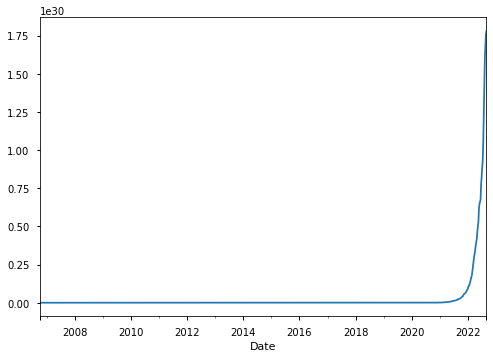

In [80]:
(1+return_data["raw_returns"]["weekly"][mask_best].mean(axis=1)).cumprod().plot()

[]

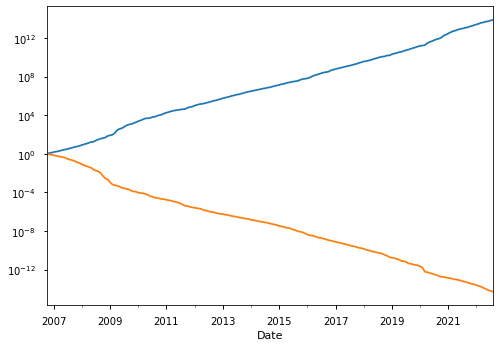

In [81]:
mask_best = return_data["score"]["monthly"].shift(1)==19
mask_worst = return_data["score"]["monthly"].shift(1)==0

(1+return_data["raw_returns"]["monthly"][mask_best].mean(axis=1)).cumprod().plot()
(1+return_data["raw_returns"]["monthly"][mask_worst].mean(axis=1)).cumprod().plot()

plt.semilogy()

## 2.4 Some Additional Checks

### 2.4.1 Signalling By Category: Long Only Category-based PFolios

**Categorized Long Only portfolio strategies versus Baseline Portfolio**

In [82]:
return_data["score"]["monthly"].shape

(191, 469)

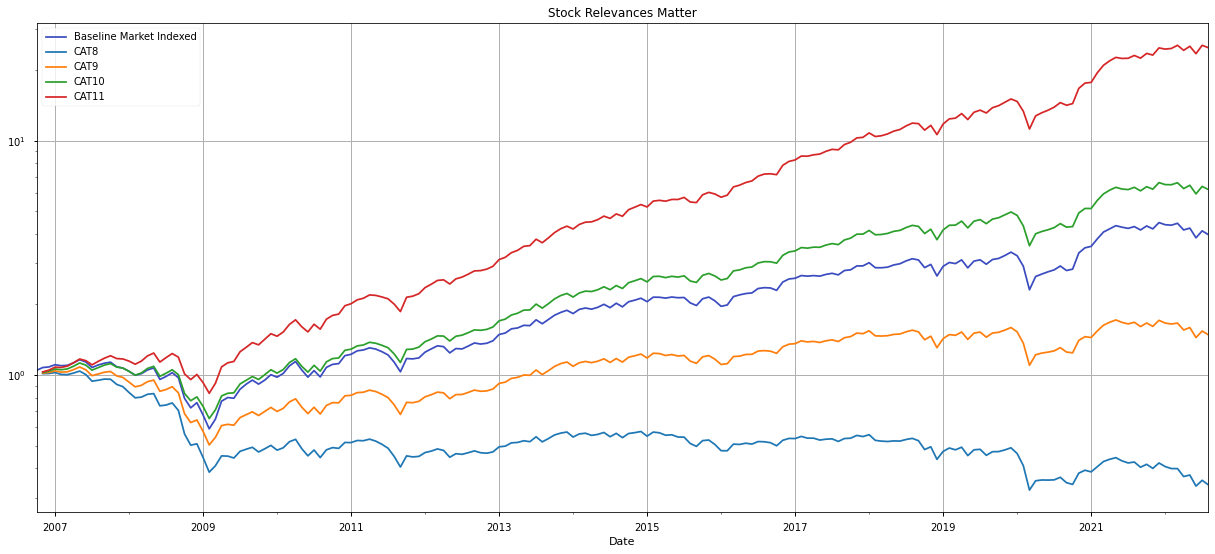

In [83]:
plt.style.use("seaborn-notebook")

plt_kwds = {
    "legend": True,
    "figsize": (21,9),
    "title": "Stock Relevances Matter"
}

# Baseline ETF biased Replica (0.2% fee p.a.)
(1+return_data["raw_returns"]["monthly"].mean(axis=1,skipna=True)+0.002/12).rename("Baseline Market Indexed").cumprod().plot(**plt_kwds, cmap="coolwarm")
plt.grid();

# CAT10 ("Median" Category)
for cat in range(8,12):
    mask = return_data["score"]["monthly"].shift(1)==cat
    (1+return_data["raw_returns"]["monthly"][mask].mean(axis=1)).rename("CAT"+str(cat)).cumprod().plot(**plt_kwds)

plt.semilogy()
plt.grid();

**Finally** A toy strategy longing better performers than the median (CAT10) and shorting worst performers (CAT12):
_Fees_, _Actual Margin Brokerage Accounts_ and _Regulatory Restrictions (such as temporal banning of short positions)_ are not taken into account.

Obviously this is a TOY trading program. We don't know a priori stock relevances and precisely for that we are intending to use **LTR Machine Learning** in order to _anticipate_ (via training these **LTR** models) the correct a __posteriori relevances__ (a good and profitable behaviour in test sets).

In [84]:
df_stock_scores = return_data["score"]["monthly"]
df_monthly_returns = return_data["raw_returns"]["monthly"]

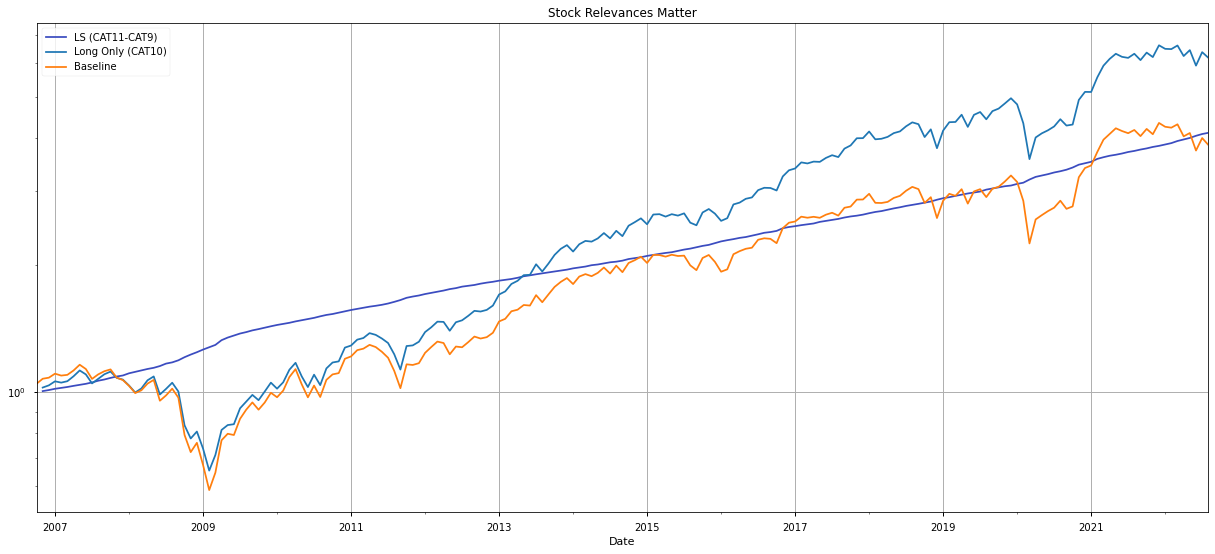

In [85]:
mask10 = (df_stock_scores.shift(1)==10)
mask9 = (df_stock_scores.shift(1)==9)
mask11 = (df_stock_scores.shift(1)==11)

(
    (1-0.5*df_monthly_returns[mask9].mean(axis=1, skipna=True)+0.5*df_monthly_returns[mask11].mean(axis=1, skipna=True)).rename("LS (CAT11-CAT9)")
    .cumprod()
    .plot(**plt_kwds, cmap="coolwarm")
)
(1+df_monthly_returns[mask10].mean(axis=1, skipna=True)).rename("Long Only (CAT10)").cumprod().plot(**plt_kwds)

(1+df_monthly_returns.mean(axis=1,skipna=True)).rename("Baseline").cumprod().plot(**plt_kwds)
plt.semilogy()
plt.grid();

## 2.5 Serialize Final Data Scoring Set on a Pickle File

* After constructing scores and then stock relevances, we proceed to dump the core relevant data for further developments:

#### Pickle Binary:

In [86]:
with open("data/config/20220831_returns_scores.pkl","wb") as file:
    pickle.dump(return_data, file)

* Checkpoint

1. Reset Kernel, minimal imports and test
2. Pickle Load
3. Check Keys() and Shapes for all `return_data`
4. Show `scores` tail (if correctly lagged `np.nan`s must appear)

In [1]:
# 1, 2
import pickle 

with open("data/config/20220831_returns_scores.pkl","rb") as handle:
    return_data = pickle.load(handle)

# 3
return_data.keys()

dict_keys(['raw_returns', 'sma_vols', 'ewma_vols', 'score'])

In [5]:
check = []

for freq in return_data["score"]:
    check.append(return_data["score"][freq].iloc[-1].isna().sum())

assert(
    check==[len(return_data["score"]["monthly"].columns)]*3
)

In [7]:
return_data["score"]["daily"].tail() #Relevant Stocks are Unknow Running Month/Week (or Day if Medium-Freq Rebalancing Considered)

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-25,3.0,5.0,9.0,5.0,1.0,2.0,16.0,8.0,1.0,16.0,...,19.0,9.0,8.0,15.0,19.0,18.0,14.0,14.0,11.0,18.0
2022-08-26,5.0,5.0,18.0,14.0,4.0,3.0,19.0,10.0,7.0,17.0,...,12.0,9.0,11.0,2.0,7.0,10.0,4.0,8.0,7.0,1.0
2022-08-29,17.0,5.0,6.0,18.0,16.0,5.0,1.0,7.0,6.0,3.0,...,1.0,2.0,2.0,18.0,13.0,9.0,16.0,14.0,10.0,6.0
2022-08-30,16.0,7.0,19.0,18.0,14.0,10.0,18.0,13.0,13.0,10.0,...,7.0,4.0,3.0,4.0,6.0,16.0,2.0,19.0,4.0,11.0
2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
return_data["score"]["monthly"].tail()

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,15.0,3.0,9.0,10.0,13.0,17.0,8.0,9.0,17.0,9.0,...,18.0,19.0,16.0,13.0,8.0,19.0,15.0,2.0,5.0,10.0
2022-05-31,11.0,10.0,10.0,11.0,6.0,5.0,4.0,13.0,3.0,14.0,...,16.0,18.0,19.0,15.0,10.0,9.0,11.0,10.0,3.0,10.0
2022-06-30,16.0,19.0,5.0,3.0,15.0,18.0,9.0,17.0,19.0,5.0,...,4.0,5.0,7.0,11.0,8.0,14.0,16.0,1.0,13.0,10.0
2022-07-29,8.0,10.0,16.0,6.0,3.0,2.0,19.0,16.0,5.0,14.0,...,2.0,2.0,4.0,3.0,11.0,4.0,7.0,2.0,8.0,6.0
2022-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Finallly, A Little Demo Showing How To Melt Relevance Data
import pandas as pd

pd.melt(
    return_data["score"]["monthly"].dropna(
        how="all"
    ),
    var_name="symbols",
    value_name="score",
    ignore_index=False
)

,symbols,score
Date,,
2006-10-31,A,1.0
2006-11-30,A,19.0
2006-12-29,A,0.0
2007-01-31,A,10.0
2007-02-28,A,17.0
...,...,...
2022-03-31,WABC,14.0
2022-04-29,WABC,10.0
2022-05-31,WABC,10.0
